# BANKING AND FINANCE DOMAIN
## Loan Eligable Status
## Business Problem Understanding 
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan. 
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

## DATA SET DESCRIPTION:
- There are 13 variable in this dataset
   - 8 categorical var
   - 4 continious var
   - 1 varr to accommodate the loan ID
   



In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
data=pd.read_csv(r"C:\Users\shaba\OneDrive\csv_xml_sheets\loan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 1.Data Understanding 
Loan ID: Unique Loan ID 

Gender: Male/Female 

Married: Applicant married 

Dependents: Number of dependents 

Education: Applicant Education 

Self_Employed whether the applicant is Self employed 

Applicantincome: Applicant income 

Coapplicantincome: Coapplicant income 

LoanAmount: Loan amount in thousands 

Loan_Amount_Term: Term of loan in months 

Credit_History: credit history meets guidelines 

Property_Area: Urban/ Semi Urban/ Rural 

Loan Status: Loan approved target variable 

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [109]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [110]:
data['Loan_ID'].nunique()

614

In [111]:
data.drop(columns=['Loan_ID'],inplace=True)

In [112]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [113]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [114]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [115]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [116]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [117]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [118]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [119]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [120]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [121]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

## Create new columns as per requirements

In [122]:
data['Income']=data['ApplicantIncome']+data['CoapplicantIncome']
data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [123]:
data['Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Income, dtype: float64

In [124]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [125]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [126]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [127]:
data['Credit_History']=data['Credit_History'].replace({1:'good',0:'bad'})

In [128]:
data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [129]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [130]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [131]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [132]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [133]:
data['Loan_Status']=data['Loan_Status'].replace({'Y':1,'N':0})

In [134]:
data['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [135]:
data['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [136]:
continous=['Income','LoanAmount']

In [137]:
descrete_categorical=['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

In [138]:
discreate_count=['Dependents','Loan_Amount_Term']

# 2.Exploratory Data Analysis
### for continous variable

In [139]:
data[continous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


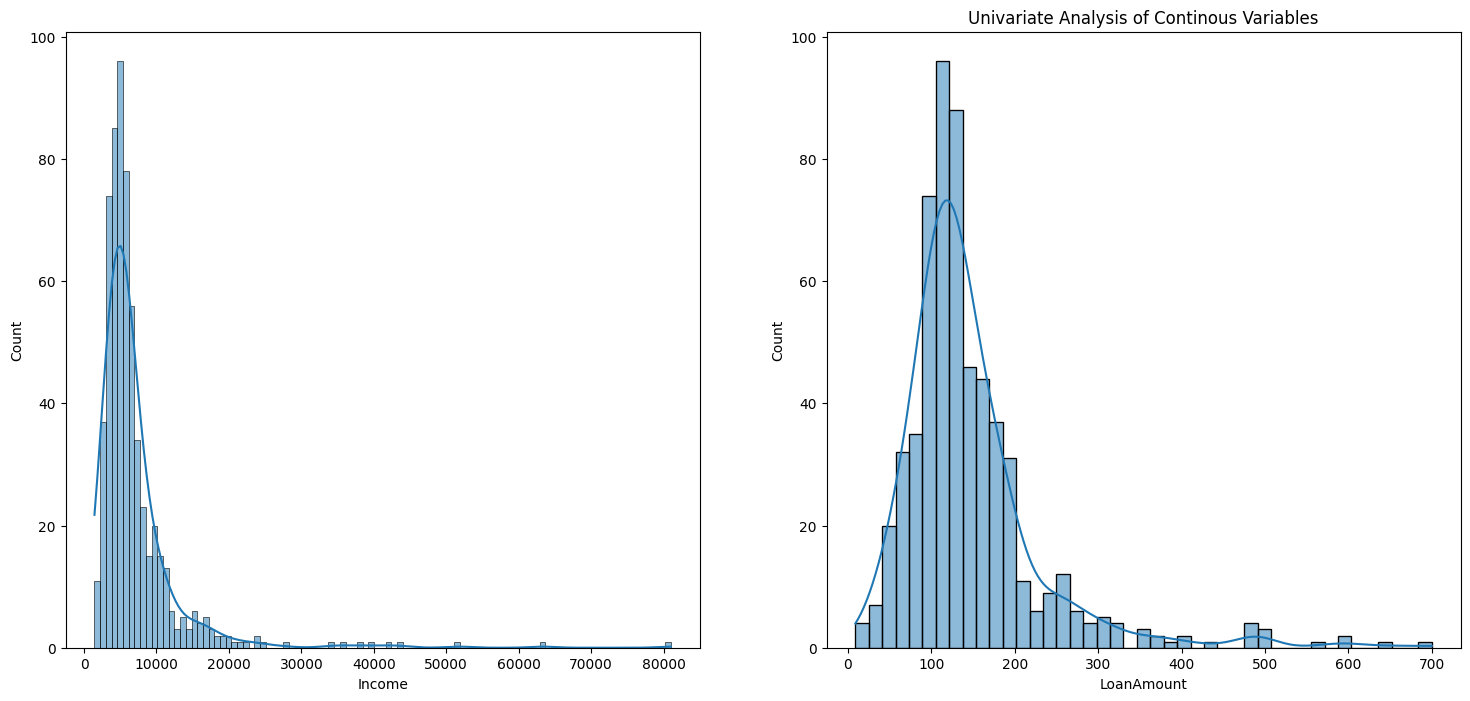

In [140]:
#applying hist for conti variables
plt.rcParams['figure.figsize']=[18,8]
plt.subplot(1,2,1)
sns.histplot(data['Income'],kde=True)

plt.subplot(1,2,2)
sns.histplot(data['LoanAmount'],kde=True)

plt.title('Univariate Analysis of Continous Variables')
plt.show()


we can observe high salary ppl applying for high amount, mostly ppl applying for less income

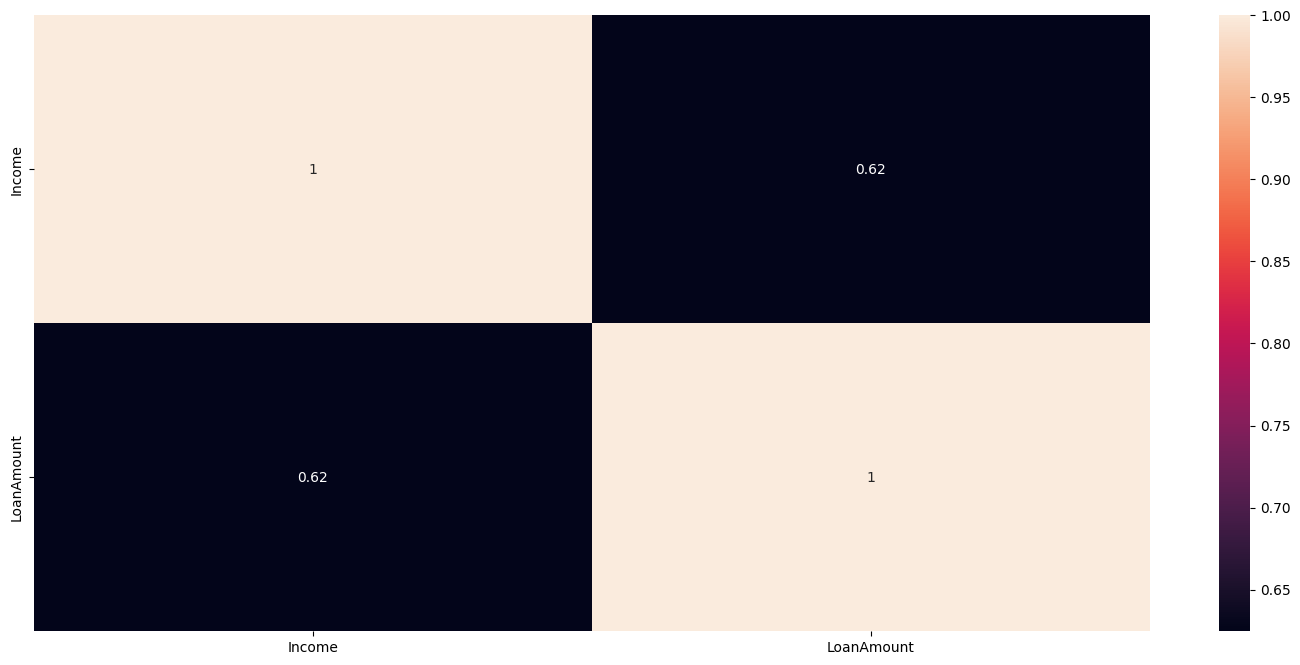

In [141]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

graph showing relation between two income ,they are correalted 60 percent

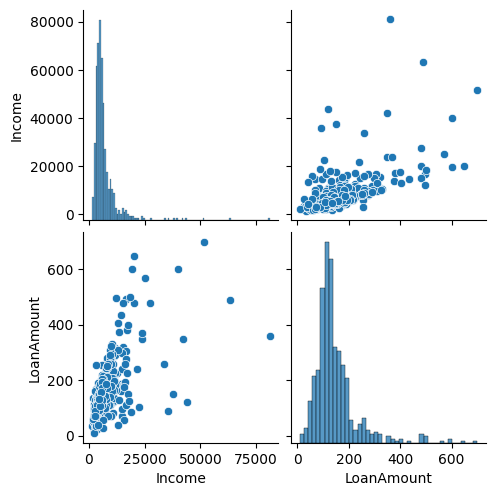

In [142]:
sns.pairplot(data[continous])
plt.show()

having positive corr as prr income increase loan amout also increase

## for disceate variable

In [143]:
data[descrete_categorical].describe()

,Loan_Status
count,614.000000
mean,0.687296
std,0.463973
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


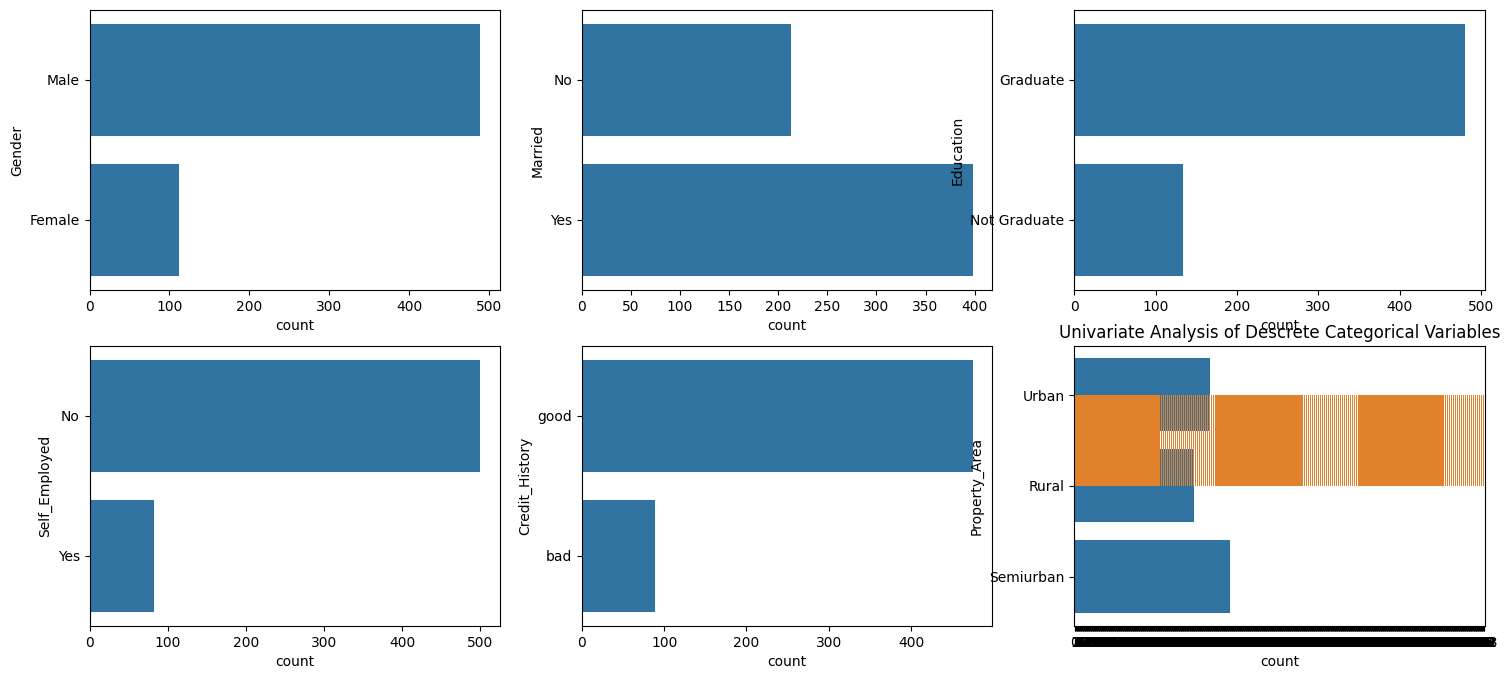

In [144]:
plt.rcParams['figure.figsize']=[18,8]
plt.subplot(2,3,1)
sns.countplot(data['Gender'])

plt.subplot(2,3,2)
sns.countplot(data['Married'])

plt.subplot(2,3,3)
sns.countplot(data['Education'])

plt.subplot(2,3,4)
sns.countplot(data['Self_Employed'])

plt.subplot(2,3,5)
sns.countplot(data['Credit_History'])

plt.subplot(2,3,6)
sns.countplot(data['Property_Area'])

plt.subplot(2,3,6)
sns.countplot(data['Loan_Status'])

plt.title('Univariate Analysis of Descrete Categorical Variables')
plt.show()

## lets compare all the catgorical with respect to the loan status understand the OVERALL IMPORTANCE

In [145]:
print('Impact of marriage on loan status')
print(pd.crosstab(data['Married'],data['Loan_Status'],normalize='index'))
print('\n')

print("Impact of Dependents on loan Status")
print(pd.crosstab(data['Dependents'],data['Loan_Status'],normalize='index'))
print('\n')

print('Impact of education on loan status')
print(pd.crosstab(data['Education'],data['Loan_Status'],normalize='index'))
print('\n')

print('Impact of self employment on loan status')
print(pd.crosstab(data['Self_Employed'],data['Loan_Status'],normalize='index'))
print('\n')

print('Impact of credit history on loan status')
print(pd.crosstab(data['Credit_History'],data['Loan_Status'],normalize='index'))
print('\n')    



Impact of marriage on loan status
Loan_Status         0         1
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080


Impact of Dependents on loan Status
Loan_Status         0         1
Dependents                     
0            0.310145  0.689855
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059


Impact of education on loan status
Loan_Status          0         1
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940


Impact of self employment on loan status
Loan_Status           0         1
Self_Employed                    
No             0.314000  0.686000
Yes            0.317073  0.682927


Impact of credit history on loan status
Loan_Status            0         1
Credit_History                    
bad             0.921348  0.078652
good            0.204211  0.795789




## checking for missing values

In [146]:
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

## check for skewness

In [147]:
data[continous].skew()

Income        5.633449
LoanAmount    2.677552
dtype: float64

## check outliers

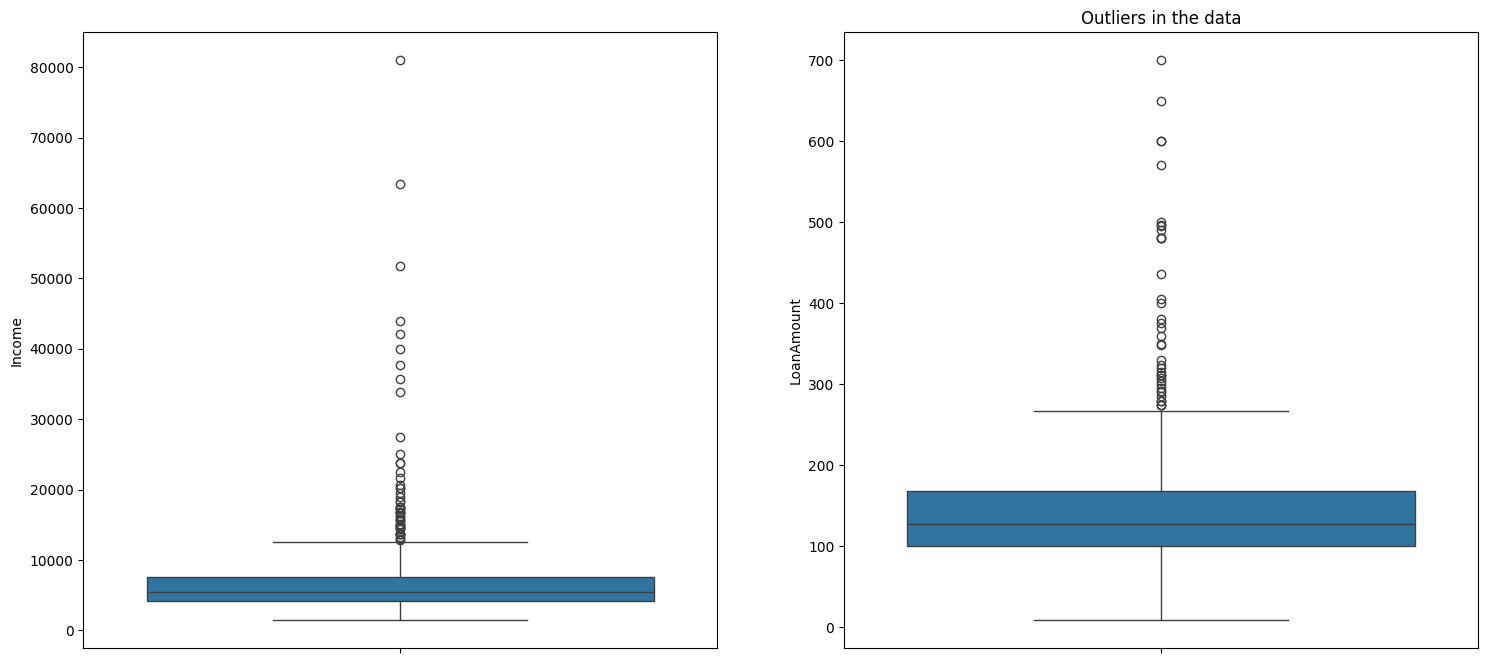

In [148]:
plt.subplot(1,2,1)
sns.boxplot(data['Income'])

plt.subplot(1,2,2)
sns.boxplot(data['LoanAmount'])

plt.title('Outliers in the data')
plt.show()

## 3.Data Preparation includes
    data cleaning
      - wrong data
      - missing values
      - wrong data type
      - drop duplicates
      - ouliers
    data wrongling
      - transformation ( applicable on continuous)
      - sealing  ( applicable on continuous)
      - encoding ( applicable on descreate categorical)
      - do not apply any worngling technique on the count variable
      
      

## missing values

In [149]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Income'],
      dtype='object')

### wrong data type

In [150]:
data['Dependents']=data['Dependents'].replace({'3+':3})

## missing values

In [151]:
data['Dependents']=data['Dependents'].fillna(0)
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data=data.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

## data type convertion

In [152]:
data['Dependents']=data['Dependents'].astype('int')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int')


# Encoding

In [153]:
data['Self_Employed'].describe

<bound method NDFrame.describe of 1       No
2      Yes
3       No
4       No
5      Yes
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 529, dtype: object>

In [154]:
data['Gender']=data['Gender'].replace({'Male':1,'Female':0})
data['Married']=data['Married'].replace({'Yes':1,'No':0})
data['Education']=data['Education'].replace({'Graduate':1,'Not Graduate':0})
data['Self_Employed']=data['Self_Employed'].replace({'Yes':1,'No':0})
data['Property_Area']=data['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})
data['Credit_History']=data['Credit_History'].replace({'good':1,'bad':0})
data['Loan_Status']=data['Loan_Status'].replace({'Y':1,'N':0})

# Transformations

In [155]:
from scipy.stats import boxcox

In [156]:
data['Income'],a=boxcox(data['Income'])
data['LoanAmount'],c=boxcox(data['LoanAmount'])

In [157]:
data[['Income','LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [158]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,360,1,0,0,1.864967
2,1,1,0,1,1,5.202610,360,1,2,1,1.856556
3,1,1,0,0,0,6.138816,360,1,2,1,1.862802
4,1,0,0,1,0,6.401083,360,1,2,1,1.864819
5,1,1,2,1,1,7.481931,360,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,360,1,0,1,1.856068
610,1,1,3,1,0,4.460305,180,1,0,1,1.860675
611,1,1,1,1,0,7.388071,360,1,2,1,1.867771
612,1,1,2,1,0,6.870558,360,1,2,1,1.866991


loan_amount_term in the months so bring into a months

In [159]:
data['Loan_Amount_Term']=data['Loan_Amount_Term']/12

In [160]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,30.0,1,0,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1,1.864819
5,1,1,2,1,1,7.481931,30.0,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,30.0,1,0,1,1.856068
610,1,1,3,1,0,4.460305,15.0,1,0,1,1.860675
611,1,1,1,1,0,7.388071,30.0,1,2,1,1.867771
612,1,1,2,1,0,6.870558,30.0,1,2,1,1.866991


In [161]:
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=70)


# 4.Modelling & Evaluation

In [163]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 

 
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import cross_val_score 

# 4.1: Logistic Regression

In [164]:
#Modelling 
log_model = LogisticRegression() 
log_model.fit(X_train,y_train) 

#Evaluation 
ypred_train = log_model.predict(X_train) 
ypred_test = log_model.predict(X_test) 

print("Train Accuracy: ", accuracy_score (y_train, ypred_train)) 
print("CV Score:", cross_val_score(log_model, X_train, y_train, cv=5, scoring="accuracy").mean()) 
print("Test Accuracy: ", accuracy_score(y_test, ypred_test)) 

Train Accuracy:  0.8226950354609929
CV Score: 0.8227731092436976
Test Accuracy:  0.7830188679245284


# 4.2: knn
  - HPT
  - Modelling & Evaluation

In [165]:
# Hyperparameter tuning 
estimator = KNeighborsClassifier() 
param_grid = {'n_neighbors':list(range(1,50))}

knn_grid= GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5) 
knn_grid.fit(X_train,y_train) 

knn_grid.best_estimator_


KNeighborsClassifier(n_neighbors=13)

In [166]:
#Modelling 
knn_model = KNeighborsClassifier(n_neighbors=13) 
knn_model.fit(X_train,y_train) 

#Evaluation 
ypred_train=  knn_model.predict(X_train) 
ypred_test = knn_model.predict(X_test) 

print("Train Accuracy: ", accuracy_score (y_train, ypred_train)) 

print("CV Score:", cross_val_score (knn_model, X_train, y_train, cv=5, scoring="accuracy").mean()) 
print("Test Accuracy: ", accuracy_score(y_test, ypred_test)) 

Train Accuracy:  0.7541371158392435
CV Score: 0.7375910364145659
Test Accuracy:  0.7075471698113207


# 4.3: Support Vector Machine (SVM)
  - HPT
  - Modelling & Evaluation

In [167]:
#Hyperparameter tuning 
estimator = SVC() 
param_grid = {'C': [0.01,0.1,1], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']} 
svm_grid = GridSearchCV(estimator, param_grid, scoring ='accuracy', cv=5) 
svm_grid.fit(X_train,y_train) 
svm_grid.best_estimator_ 

SVC(C=0.1, kernel='linear')

In [168]:
#Modelling 
svm_model = SVC(C=0.1, kernel='linear') 
svm_model.fit(X_train,y_train) 

# Evaluation 
ypred_train= svm_model.predict(X_train) 

print("Train Accuracy:", accuracy_score (y_train, ypred_train) )
print("CV Score:",cross_val_score(svm_model,X_train,y_train,cv=5,scoring ='accuracy').mean())

ypred_test = svm_model.predict(X_test) 
print("Test Accuracy: ", accuracy_score (y_test, ypred_test)) 

Train Accuracy: 0.8226950354609929
CV Score: 0.8227731092436976
Test Accuracy:  0.7830188679245284


# 4.4 Decision Tree Classifier 
  - HPT 
  - Identify important features by using feature seclection (ensemble method) 
  - Modelling & Evaluation 

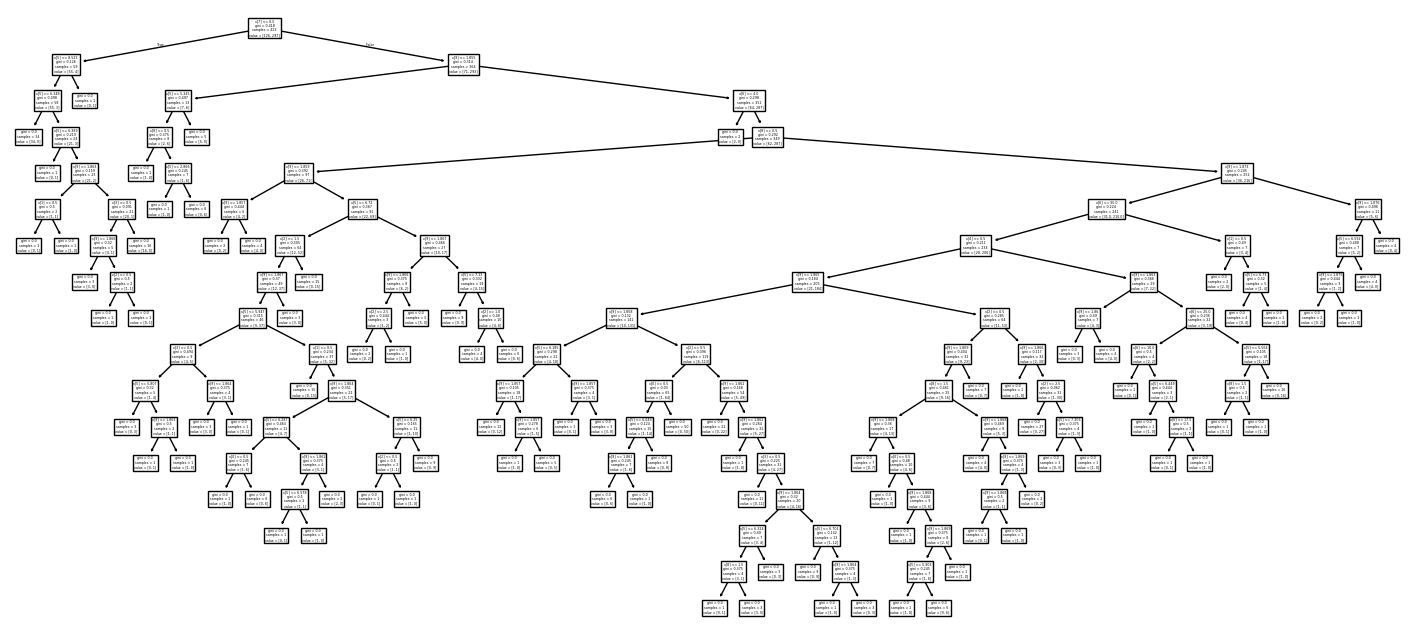

In [169]:
model=DecisionTreeClassifier(random_state=True) 
model.fit(X_train,y_train) 
from sklearn.tree import plot_tree 
plot_tree(model) 
plt.show()

In [170]:
#Hyper parameter tuning 
estimator = DecisionTreeClassifier(random_state=True) 
param_grid = {"criterion": ["gini", "entropy"], 
"max_depth": list(range (1,16))}

dt_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

dt=dt_grid.best_estimator_

In [171]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [172]:
feats_ab=pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Importance'])
important_features_dt=feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_dt

['Credit_History']

creating decision tree model with important parameters and features

In [183]:
#Selecting train & test data 
X_train_dt = X_train[important_features_dt] 
X_test_dt =X_test[important_features_dt] 

#Modelling 
dt.fit(X_train_dt,y_train) 

#Evaluation 
ypred_train = dt.predict(X_train_dt) 
ypred_test = dt.predict(X_test_dt) 

print("Train Accuracy:", accuracy_score(y_train, ypred_train)) 
print('cv score:',cross_val_score(dt,X_train_dt,y_train,cv=5,scoring="accuracy").mean()) 
print("Test Accuracy:",accuracy_score(y_test,ypred_test)) 

Train Accuracy: 0.8226950354609929
cv score: 0.8227731092436976
Test Accuracy: 0.7830188679245284


# 4.5: Random Foresr classifier
   - HPT
   - identify importance features
   - modeling
   - evaluation

In [184]:
#Hyper parameter tuning 
estimator= RandomForestClassifier (random_state=True) 
param_grid = {'n_estimators': list(range(1,51))} 
rf_grid =GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5) 
rf_grid.fit(X_train,y_train) 

rf=rf_grid.best_estimator_ 

In [185]:
rf

RandomForestClassifier(n_estimators=21, random_state=True)

In [186]:
#Important features 
feats_ab =pd. DataFrame (data=rf.feature_importances_, index=X.columns,columns=['Importance'])  
important_features_rf = feats_ab[feats_ab["Importance"]>0].index.tolist() 
important_features_rf 

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [190]:
X_train_rf= X_train [important_features_rf] 
X_test_rf = X_test[important_features_rf] 

#Modelling 
rf.fit(X_train_rf,y_train) 

#Evaluation 
ypred_train=rf.predict(X_train_rf) 
ypred_test=rf.predict(X_test_rf)  

print("Train Accuracy:", accuracy_score(y_train, ypred_train)) 
print('cv score:',cross_val_score(rf,X_train_rf,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:", accuracy_score(y_test, ypred_test)) 

Train Accuracy: 0.9952718676122931
cv score: 0.8203641456582634
Test Accuracy: 0.7735849056603774


# 4.6: ada boost classifier

In [191]:
estimator=AdaBoostClassifier (random_state=True) 
param_grid = {'n_estimators': list(range(1,51))} 
ab_grid =GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5) 
ab_grid.fit(X_train,y_train) 
 
ab=ab_grid.best_estimator_ 
ab 

AdaBoostClassifier(n_estimators=3, random_state=True)

In [192]:
#Important features 
feats_ab =pd. DataFrame (data=ab.feature_importances_, index=X.columns,columns=['Importance'])  
important_features_ab = feats_ab[feats_ab["Importance"]>0].index.tolist() 
important_features_ab 

['Credit_History', 'Property_Area', 'Income']

In [193]:
X_train_ab= X_train [important_features_ab] 
X_test_ab= X_test[important_features_ab] 

#Modelling 
ab.fit(X_train_ab,y_train) 

#Evaluation 
ypred_train=ab.predict(X_train_ab) 
ypred_test=ab.predict(X_test_ab)  

print("Train Accuracy:", accuracy_score(y_train, ypred_train)) 
print('cv score:',cross_val_score(ab,X_train_ab,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:", accuracy_score(y_test, ypred_test)) 

Train Accuracy: 0.83451536643026
cv score: 0.8298879551820729
Test Accuracy: 0.7641509433962265


'''Train Accuracy: 0.83451536643026

cv score: 0.8298879551820729

Test Accuracy: 0.7641509433962265

Note: here is no equality this kind of result is overfitted do not consider this.'''


# 4.7: Gradient Boost classifier

In [194]:
estimator=GradientBoostingClassifier(random_state=True) 
param_grid = {"n_estimators": list(range(1,10)),"learning_rate": [0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1.0]} 
gb_grid=GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5) 
gb_grid.fit(X_train,y_train) 
gb=gb_grid.best_estimator_ 

In [195]:
#Important features 
feats_gb=pd.DataFrame (data=gb.feature_importances_, index=X.columns,columns=['Importance'])  
important_features_gb = feats_gb[feats_gb["Importance"]>0].index.tolist() 
important_features_gb

['Married',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [201]:
X_train_gb= X_train[important_features_gb] 
X_test_gb= X_test[important_features_gb] 

#Modelling 
gb.fit(X_train_gb,y_train) 

#Evaluation 
ypred_train=gb.predict(X_train_gb) 
ypred_test=gb.predict(X_test_gb)  

print("Train Accuracy:", accuracy_score(y_train, ypred_train)) 
print('cv score:',cross_val_score(gb,X_train_gb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:", accuracy_score(y_test, ypred_test)) 

Train Accuracy: 0.8321513002364066
cv score: 0.8227450980392158
Test Accuracy: 0.7735849056603774


# 4.8: XG Boost Classifier

In [199]:
#Hyperparameter tuning 
estimator=XGBClassifier() 
param_grid ={"n_estimators": [10, 20,40,100],'max_depth': [3,4,5],'gamma': [0,0.15,0.3,0.5,1]} 

xgb_grid= GridSearchCV(estimator, param_grid, scoring="accuracy", cv=5) 
xgb_grid.fit(X_train,y_train) 
xgb=xgb_grid.best_estimator_

In [200]:
#Important features 
feats_xgb=pd.DataFrame (data=xgb.feature_importances_, index=X.columns,columns=['Importance'])  
important_features_xgb = feats_xgb[feats_xgb["Importance"]>0].index.tolist() 
important_features_xgb

['Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [202]:
X_train_xgb= X_train[important_features_xgb] 
X_test_xgb= X_test[important_features_xgb] 

#Modelling 
xgb.fit(X_train_xgb,y_train) 

#Evaluation 
ypred_train=xgb.predict(X_train_xgb) 
ypred_test=xgb.predict(X_test_xgb)  

print("Train Accuracy:", accuracy_score(y_train, ypred_train)) 
print('cv score:',cross_val_score(xgb,X_train_xgb,y_train,cv=5,scoring="accuracy").mean())
print("Test Accuracy:", accuracy_score(y_test, ypred_test)) 

Train Accuracy: 0.8557919621749409
cv score: 0.8275070028011206
Test Accuracy: 0.7735849056603774


note: consider cv score first according to that select one model, here 3 having same result that is LR ,SVM and DT

here DT is good model ,beacuse we are considering only one column

# presentation

In [204]:
from joblib import dump
dump(dt,'loan_joblib')

['loan_joblib']

# Predict on new data

In [206]:
input_data={"Loan_ID": "LP002991", 
    "Gender": "Male", 
    "Married": "No", 
    "Dependents":1, 
    "Education":"Graduate", 
    "Self_Employed":"yes" ,
    "ApplicantIncome":1000, 
    "CoapplicantIncome":0, 
    "LoanAmount":100, 
    "Loan_Amount_Term":240, 
    "Credit_History":"bad", 
    "Property_Area": "Urban"} 

In [207]:
data=pd.DataFrame(input_data,index=[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,No,1,Graduate,yes,1000,0,100,240,bad,Urban


# apply data preprocessing on unknowm data

In [209]:
data.drop(columns=["Loan_ID"], inplace=True) 
data["Income"] = data['ApplicantIncome'] + data['CoapplicantIncome'] 
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True) 

data['Dependents'] = data['Dependents'].fillna(0) 
data['Gender'] = data['Gender'].fillna (data['Gender'].mode()[0]) 
data['Married'] = data['Married'].fillna (data['Married'].mode()[0]) 
data['Self_Employed'] = data['Self_Employed'].fillna (data['Self_Employed'].mode()[0]) 
data=data.dropna(subset=["Income", 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']) 
data['Dependents'] = data['Dependents'].astype('int') 
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int') 
 
data['Gender'] = data['Gender'].replace({'Male':1, 'Female':0}) 
data['Married'] = data['Married'].replace({'Yes':1, 'No':0}) 
data['Education'] = data['Education'].replace({'Graduate': 1, 'Not Graduate':0}) 
data['Self_Employed']= data['Self_Employed'].replace({'Yes':1, 'No':0})  
data['Property_Area']=data['Property_Area'].replace({'Rural':0, 'SemiUrban':1, 'Urban':2})
data['Credit_History'] = data['Credit_History'].replace({'good':1, 'bad':0})
data['Loan_Amount_Term']=data['Loan_Amount_Term']/12

X_new=data

In [219]:
X_new

,Credit_History
0,0


In [220]:
X=X_new[important_features_dt]

In [221]:
ans=pd.DataFrame(dt.predict(X),columns=['predicted'])
ans

,predicted
0,0


In [211]:
# select important of features of your best model
X_new=X_new[['Credit_History']]

# apply and predict using your best model
dt.predict(X_new)

array([0], dtype=int64)

In [223]:
pd.concat([data,ans],axis=1)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income,predicted
0,1,0,1,1,yes,100,20.0,0,2,1000,0
